Information Visualization: Homework 1

In [1]:
# Importing required packages

import numpy as np 
import pandas as pd
from os import listdir
import glob
import plotly
import os
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
import imageio
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Question 1. Take the Gapminder Test: http://forms.gapminder.org/s3/test-2018.
What score did you receive? Did any of the answers surprise you?
Choose a question from the test, re-state it, and answer it using visualization and summarization. Provide a
figure and any relevant output with your answer.

Gapminder test: I scored 7/13. In most cases I was more optimistic about the world and the reality showed harsh facts.
Question that I found to be interesting is:

Actual Question: What is the life expectancy of the world population?
Answer: 70 years, this sounds like a good number, how has this changed through years?
Restated Question: How has the life expectancy varied through years?

Text(0,0.5,'Life Expectancy Value')

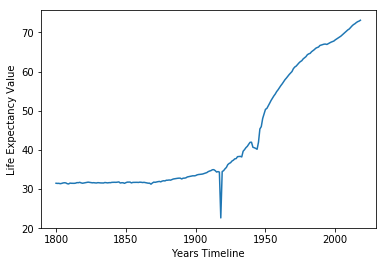

In [2]:
ListOfFiles = glob.glob("C:/Users/saich/Desktop/Information Visualization Proj/HW1/*.txt")

LifeExpectancyData = pd.read_csv(ListOfFiles[2])

PlotData = LifeExpectancyData.groupby(['time']).mean().reset_index()

plt.plot(PlotData['time'], PlotData['life_expectancy_years'])
plt.xlabel("Years Timeline")
plt.ylabel("Life Expectancy Value")

There have been huge drops in historical life expectancy values, these could be due to unexpected wars, famines. In earlier years we can see that life expectancy has been very low compared to recent years, this might be linked to lack of proper health and living conditions. But, it is a very positive sign that life expectancy has improved a lot in recent years.

Question 2. Visualize the distribution of income (GDP / capita) across countries and continents, and how the distribution
of income changes over time.
Interpret the visualization and what you notice. Are they any notable trends and/or deviations from that
trend?
What caveats apply to your conclusions?

In [3]:
import plotly.express as px

PerCapitaData = pd.read_csv("C:/Users/saich/Desktop/Information Visualization Proj/HW1/2/ddf--datapoints--gdppercapita_us_inflation_adjusted--by--geo--time.txt")
PerCapitaData['geo'] = PerCapitaData['geo'].str.upper() 

StartYear = PerCapitaData['time'].min()
LatestYear = PerCapitaData['time'].max()

for year in range(StartYear, LatestYear):
    GeoCapitaData = PerCapitaData.query("time=="+ str(year))
    fig = px.choropleth(GeoCapitaData, locations="geo",
                        color="gdppercapita_us_inflation_adjusted", 
                        hover_name="geo",
                        title = str(year),
                        color_continuous_scale=px.colors.sequential.Plasma)
    fig.write_image("C:/Users/saich/Desktop/Information Visualization Proj/HW1/2/maps/" + "year_" + str(year) + ".png")

In [4]:
filenames = glob.glob("C:/Users/saich/Desktop/Information Visualization Proj/HW1/2/maps/*.png")
images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('C:/Users/saich/Desktop/Information Visualization Proj/HW1/2/movie.gif', images)

Interpretations: We can notice that there has been tremendous increase in income across select countries while there are countries that have not shown much improvement across the spread of time. America and europe have noticeably had very positive change through the years whereas africa and most of asia have not shown huge improvements. There has been massive increase in select middle eastern countries in mid 1900's like saudi arabia, qatar, and Iran, this might be due to the rise in oil production and consumption

Question 3. Use visualization to investigate the relationship between income (GDP / capita), life expectancy, and child
mortality over time. How does each measure change over time within each continent? Interpret your visualizations, noting any trends and/or outliers.

In [5]:
# Mortality data
MortalityData = pd.read_csv('C:/Users/saich/Desktop/Information Visualization Proj/HW1/3/ddf--datapoints--child_mortality_0_5_year_olds_more_years_version_7--by--geo--time.txt')

# Reading world entities data to create mapping for countries with continents
MappingData = pd.read_csv('C:/Users/saich/Desktop/Information Visualization Proj/HW1/3/ddf--entities--geo--country.txt')
MappingDataNew = MappingData[['country','world_4region']]

In [6]:
# Creating master dataset
PerCapitaData = pd.read_csv("C:/Users/saich/Desktop/Information Visualization Proj/HW1/2/ddf--datapoints--gdppercapita_us_inflation_adjusted--by--geo--time.txt")

MasterDataset = pd.merge(LifeExpectancyData, MortalityData, on= ['geo','time'])
MasterDataset = pd.merge(MasterDataset, PerCapitaData, on= ['geo','time'])
MasterDataset = pd.merge(MasterDataset, MappingDataNew, left_on= 'geo', right_on= 'country')

In [7]:
MasterDataset.head()

,geo,time,life_expectancy_years,child_mortality_0_5_year_olds_more_years_version_7,gdppercapita_us_inflation_adjusted,country,world_4region
0,afg,2002,52.43,129.4,364.57057,afg,asia
1,afg,2003,53.03,125.9,376.75871,afg,asia
2,afg,2004,53.50,122.4,364.09544,afg,asia
3,afg,2005,53.87,119.0,389.41636,afg,asia
4,afg,2006,54.15,115.8,397.98590,afg,asia


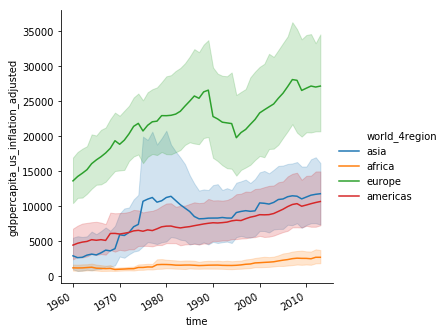

In [13]:
# Plotting different metrics like mortality, life expectancy, per capita income through years for different continents

# Plotting per capita income through years
g = sns.relplot(x="time", y="gdppercapita_us_inflation_adjusted", kind="line", hue = "world_4region", data=MasterDataset)
g.fig.autofmt_xdate()

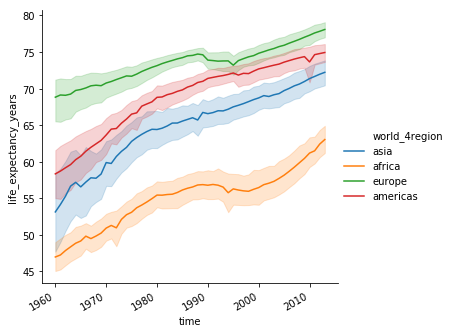

In [14]:
# Plotting life expectancy through years
g = sns.relplot(x="time", y="life_expectancy_years", kind="line", hue = "world_4region", data=MasterDataset)
g.fig.autofmt_xdate()

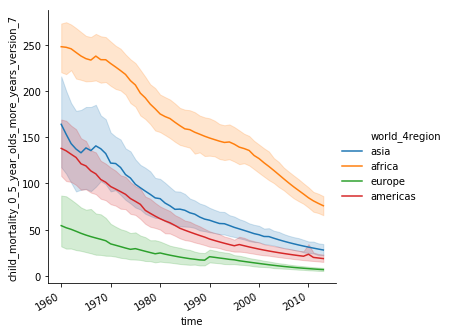

In [15]:
# Plotting child mortality through years
g = sns.relplot(x="time", y="child_mortality_0_5_year_olds_more_years_version_7", kind="line", hue = "world_4region", data=MasterDataset)
g.fig.autofmt_xdate()

Interpretation: We can see that lide expectancy and gdp are directly proportional, whereas life expectancy and mortality rates are inversely proportional. When it comes to child mortality, europe seems to be the best performer while africa has made the most progress in bringing down the numbers but still has a long way to go. In both gdp and life expectancy america and asia seem to be equally performing countries whereas europe has outperformed other countries. GDP increase means that countries wealth is improving which results in better living and health conditions and hence results in increase of life expectancy and decrease in mortality rates.

Question 4. Choose two variables you have not investigated yet, and visualize their distributions, their relationship with
   each other, and how these change over time.
   Interpret your visualizations, noting any trends and/or outliers

In [21]:
# Reading data and making necessary transformations

MalariaDeaths = pd.read_csv("C:/Users/saich/Desktop/Information Visualization Proj/HW1/4/ddf--datapoints--malaria_deaths_per_100000_reported--by--geo--time.txt")
MalariaCases = pd.read_csv("C:/Users/saich/Desktop/Information Visualization Proj/HW1/4/ddf--datapoints--malaria_cases_per_100000_reported--by--geo--time.txt")

MalariaDataset = pd.merge(MalariaDeaths, MalariaCases, on= ['geo','time'])

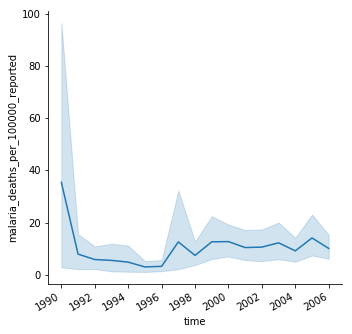

In [26]:
graph1 = sns.relplot(x="time", y="malaria_deaths_per_100000_reported", kind="line", data=MalariaDataset)
graph1.fig.autofmt_xdate()

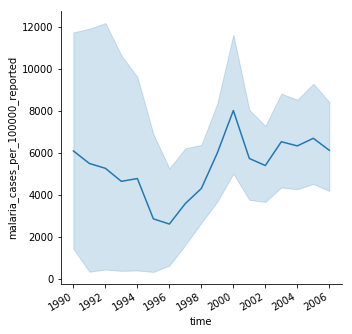

In [29]:
graph2 = sns.relplot(x="time", y="malaria_cases_per_100000_reported", kind="line", data=MalariaDataset)
graph2.fig.autofmt_xdate()

Interpretation: From the above graphs we get a mixed understanding as there is no clear indicator that governments have made significant progress in eradicating malaria. Because the number of malaria cases have gone up which means prevention and awareness methods have failed inspite of proactively campaigning about malaria. On the other hand we can see that malaria deaths have seen a huge drop across the years, which means that treatment methods have been successul like vaccinations.

Question 5. Did you use static or interactive plots to answer the previous problems?
Explore the data using the interactive visualization tools at https://www.gapminder.org/tools, and watch
the TED talk “The best stats you’ve ever seen” at https://www.youtube.com/watch?v=hVimVzgtD6w.
Discuss the advantages, disadvantages, and relative usefulness of using interactive/dynamic visualizations
versus static visualizations.

Answer: I have used static plots, as in this case keeping it simple for the user would be the best way to give the takeaway. For 2nd question inorder to understand distribution of per capita income across different countries and continents, I have used several chloropleth plots and generated a gif, which shows value variations across each country and continent using colors as time passes. Required relationships and trends could be explained and identified using static plots in our cases.

Advantages of interactive plots: When multiple variables are present and the number of combination of visualizations that need to be looked at are more in number we can use interactive visualization so as to give the user a better view. Static plots cannot be used in this case as large number of static plots are required to convey the same message as an interactive plot

Advantages of static plots: When number of variables in play are less then the key takeaways can be kept simple to give the user best possible understanding. When plots have to be given as a physical copy then interactive plots cannot be used, in these cases static plots are best suited